<a href="https://colab.research.google.com/github/muhammadsajad/100_Days_of_Deep_Learning/blob/main/Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [2]:
# Making directory for uploading kaggle api
!mkdir -p /root/.kaggle

In [5]:
# Upload manualy your kaggle api to directory and copy it to the root/.kaggle directory
!cp kaggle.json /root/.kaggle

In [6]:
# Now download the dataset from kagle through your api by copying the api cammand of data set present on the data set page
!kaggle datasets download -d rakeshrau/social-network-ads

Dataset URL: https://www.kaggle.com/datasets/rakeshrau/social-network-ads
License(s): unknown
social-network-ads.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# Unzip the data set
!unzip /content/social-network-ads.zip

Archive:  /content/social-network-ads.zip
  inflating: Social_Network_Ads.csv  


In [8]:
# load the data set into a data frame
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df=df.iloc[:,2:]

In [11]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

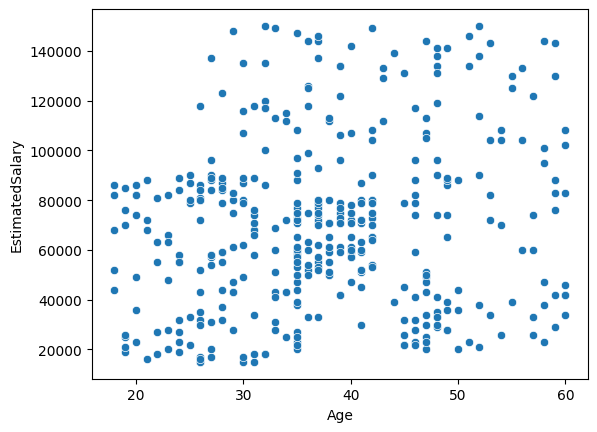

In [12]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [13]:
X=df.iloc[:,0:2]
y=df.iloc[:,2]

In [14]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
model=Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 32ms/step - loss: 1025.4657 - accuracy: 0.5594 - val_loss: 291.3097 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 203.0126 - accuracy: 0.5281 - val_loss: 122.0134 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 181.0499 - accuracy: 0.4969 - val_loss: 277.8994 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 144.2114 - accuracy: 0.5094 - val_loss: 91.2288 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 69.2223 - accuracy: 0.5219 - val_loss: 55.5921 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 22.8282 - accuracy: 0.4781 - val_loss: 0.9185 - val_accuracy: 0.5000
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 24.0974 - accuracy: 0.4938 - val_loss: 20.3923 - val_accuracy

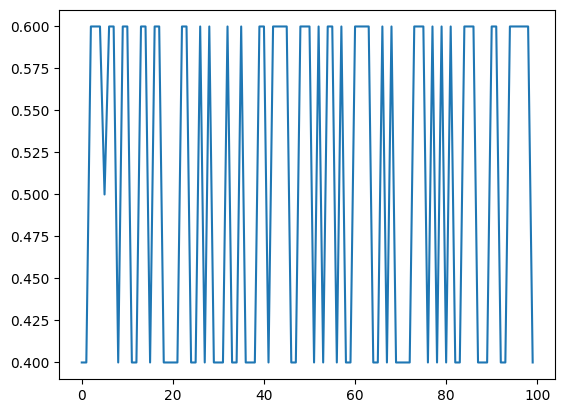

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

# Now Applying Scaling to normalise data for fast convergence. we use standadiztion here not a normalization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

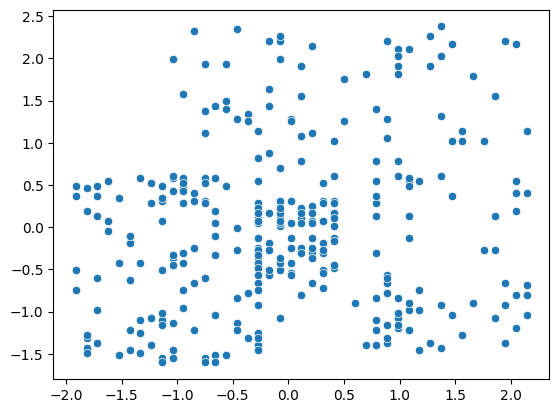

In [30]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [32]:
model=Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 43ms/step - loss: 0.7419 - accuracy: 0.3500 - val_loss: 0.6999 - val_accuracy: 0.4750
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6778 - accuracy: 0.5969 - val_loss: 0.6364 - val_accuracy: 0.8125
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6213 - accuracy: 0.8500 - val_loss: 0.5825 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5735 - accuracy: 0.8469 - val_loss: 0.5374 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5337 - accuracy: 0.8438 - val_loss: 0.4977 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4980 - accuracy: 0.8500 - val_loss: 0.4642 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4667 - accuracy: 0.8500 - val_loss: 0.4356 - val_accuracy: 0.8000
Epoch 8/100

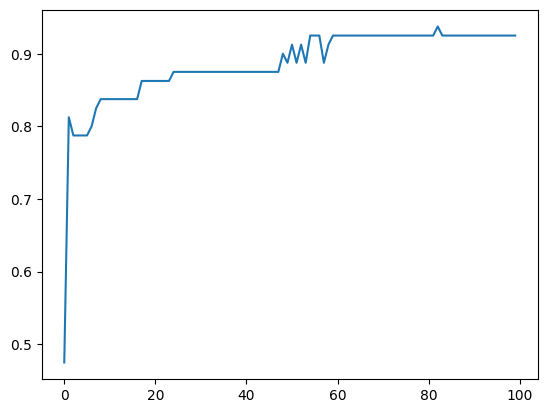

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])